In [286]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

# METRICS PER MODEL

In [185]:
efficientDet0_global = {'p':0.63, 'r':0.538, 'f': 0.526}
efficientDet1_global = {'p':0.6, 'r':0.594, 'f': 0.535}

In [246]:
def plot_global_metrics(list_res):
    labels = []
    for x in range(len(list_res)):
        labels.append("efficientDet{}".format(x))
    p = [ res['p'] for res in list_res ]
    r = [ res['r'] for res in list_res ]
    f = [ res['f'] for res in list_res ]
    
    x = np.arange(len(labels))
    width = 0.2
    
    # plot data in grouped manner of bar type
    plt.bar(x-0.2, p, width, color='cyan')
    plt.bar(x, r, width, color='orange')
    plt.bar(x+0.2, f, width, color='green')
    plt.xticks(x, labels)
    plt.xlabel("Model")
    plt.ylabel("Metrics")
    plt.legend(["Precision", "Recall", "F1-score"],bbox_to_anchor = (1.05, 0.6))
    plt.title("Metrics per model")
    plt.savefig("/home/acarlier/code/OrnithoScope/data/global_metrics_per_efficientDet.jpg",bbox_inches='tight',dpi=100)   
    plt.show()


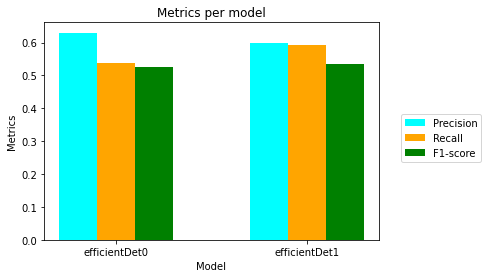

In [247]:
plot_global_metrics([efficientDet0_global,efficientDet1_global])

# METRICS PER MODEL PER CLASSES

In [250]:
efficientDet0 = pickle.load( open( "/home/acarlier/code/OrnithoScope/saved_models/class_metrics_efficientDet0.p", "rb" ) )
efficientDet1 = pickle.load( open( "/home/acarlier/code/OrnithoScope/saved_models/class_metrics_efficientDet1.p", "rb" ) )


In [253]:
print(len(efficientDet0))
efficientDet0[0]

16


{'Precision': 0.896, 'Rappel': 0.968, 'F-score': 0.931}

In [248]:
classes = ['MESCHA', 'SITTOR', 'MESBLE', 'MESNON', 'PINARB', 'ACCMOU', 'ROUGOR', 'VEREUR', 'MOIDOM', 'TOUTUR', 'ECUROU', 'PIEBAV', 'MULGRI', 'CAMPAG', 'MESNOI', 'MESHUP']
len(classes)

16

In [77]:
def plot_class_metrics_per_efficientDet(list_of_metrics_per_efficientDet, list_of_classes):

    for efficientDet_metrics in list_of_metrics_per_efficientDet:
        i = 0
        l = 1
        fig, axs = plt.subplots(len(list_of_classes),len(list_of_metrics_per_efficientDet),figsize=(15,15))

        for res in efficientDet_metrics:
            class_name = list_of_classes[i]
            vnames = [name for name in globals() if globals()[name] is efficientDet_metrics]
            ax1 = plt.subplot(4, 4, l)
            names = list(res.keys())
            values = list(res.values())
            plt.bar(range(len(res)), values, tick_label=names)
            ax1.set_ylim([0, 1])
            l += 1
            plt.title(vnames[0])
            i +=1

    #plt.savefig("/home/acarlier/code/OrnithoScope/data/class_metrics_per_efficientDet.jpg",bbox_inches='tight',dpi=100)

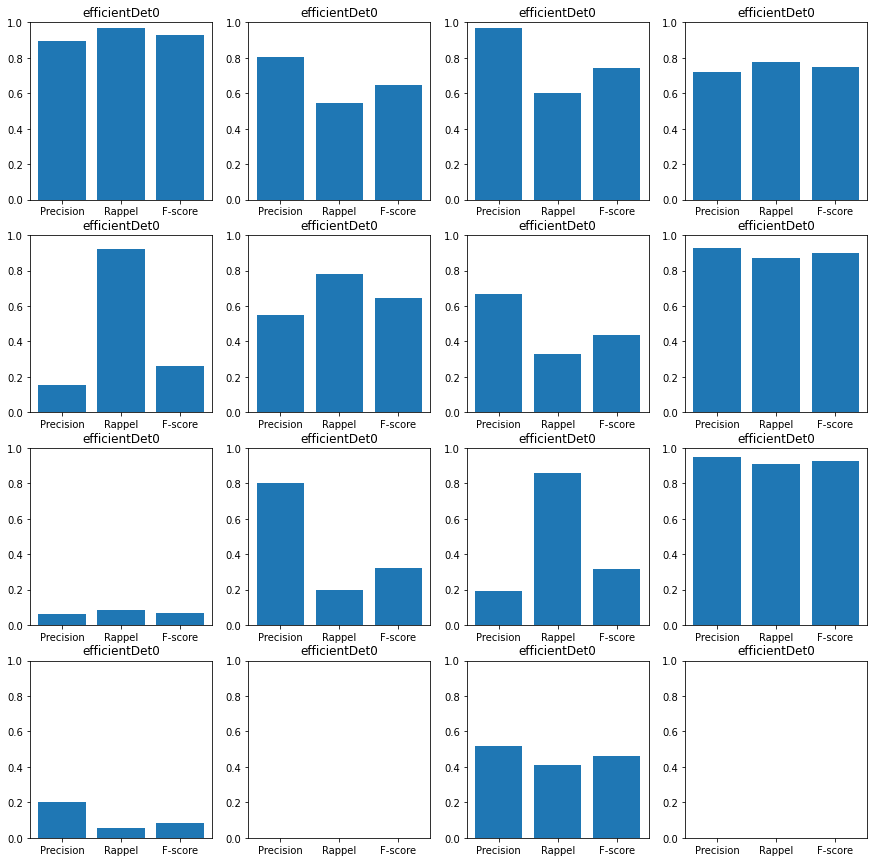

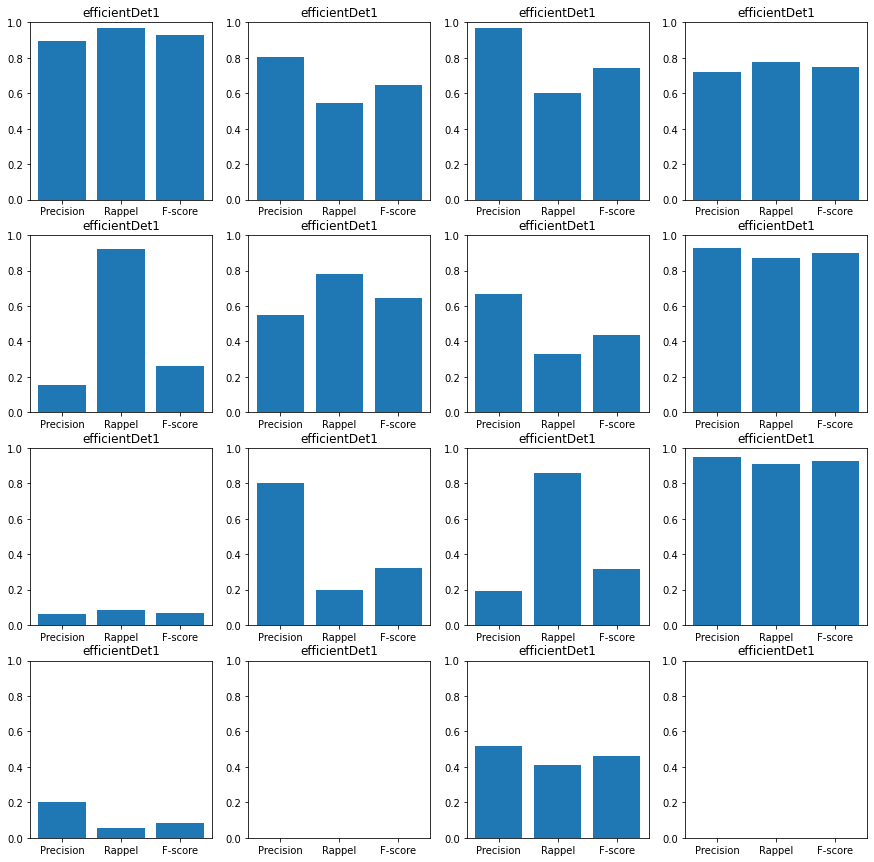

In [78]:
plot_class_metrics_per_efficientDet([efficientDet0,efficientDet1], classes)

In [162]:
def plot_class_metrics_per_class_and_efficientDet(list_of_metrics_per_efficientDet, list_of_classes):
    X = list_of_classes
    Y1 = list_of_metrics_per_efficientDet[0][0].values()
    Y2 = list_of_metrics_per_efficientDet[0][0].values()
    
    X_axis = np.arange(len(X))
    
    plt.bar(X_axis - 0.2, Y1, 0.4, label = 'EfficientDet0')
    plt.bar(X_axis + 0.2, Y2, 0.4, label = 'EfficientDet1')
    
    plt.xticks(X_axis, X)
    plt.xlabel("Groups")
    #plt.ylabel("Number of Students")
    plt.title("Metrics per class per model")
    plt.legend()
    plt.show()

In [284]:
def plot_test(list_of_metrics_per_efficientDet, list_of_classes):
    labels = []
    for x in range(len(list_of_metrics_per_efficientDet)):
        labels.append("efficientDet{}".format(x))
    print(labels)
    p_per_efficientDet = []
    r_per_efficientDet = []
    f_per_efficientDet = []
    for model in list_of_metrics_per_efficientDet:
        for metrics in model:
            p_per_efficientDet.append(metrics['Precision'])
            r_per_efficientDet.append(metrics['Rappel'])
            f_per_efficientDet.append(metrics['F-score'])
    print(len(p_per_efficientDet), len(r_per_efficientDet), len(f_per_efficientDet))
    print('data imported')
    x = np.arange(len(p_per_efficientDet))
    width = 0.2
    
    # plot data in grouped manner of bar type
    plt.bar(x-0.2, p_per_efficientDet, width, color='cyan')
    plt.bar(x, r_per_efficientDet, width, color='orange')
    plt.bar(x+0.2, f_per_efficientDet, width, color='green')
    #plt.xticks(x, labels)
    plt.xlabel("Model")
    plt.ylabel("Metrics")
    plt.legend(["Precision", "Recall", "F1-score"],bbox_to_anchor = (1.05, 0.6))
    plt.title("Metrics per model")
    #plt.savefig("/home/acarlier/code/OrnithoScope/data/metrics_per_classes_per_model.jpg",bbox_inches='tight',dpi=100)   
    plt.show()

In [303]:
def plot_test2(list_of_metrics_per_efficientDet, list_of_classes):
    df = pd.DataFrame(
        [['A_eff0', 10, 20, 10], 
         ['A_eff1', 20, 25, 15], 
         ['C', 12, 15, 19],
         ['D', 10, 29, 13]
         ],
        columns=['class', 'p', 'r', 'f'])
    # view data
    print(df)
    
    # plot grouped bar chart
    df.plot(x='class',
            kind='bar',
            stacked=False,
            title='Grouped Bar Graph with dataframe')

    class   p   r   f
0  A_eff0  10  20  10
1  A_eff1  20  25  15
2       C  12  15  19
3       D  10  29  13


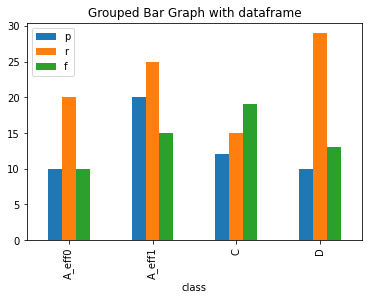

In [304]:
#plot_test([efficientDet0,efficientDet1], classes)
plot_test2([efficientDet0,efficientDet1], classes)